Import necesary libraries

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

Loading the data

In [81]:
data = pd.read_csv('../dataset/sales_data.csv')

Converting "Date" column to datetime

In [82]:
data['Date'] = pd.to_datetime(data['Date'])

Keep only the complete years

In [83]:
data = data[data['Date'].dt.year < 2025]

Extracting time features

In [84]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Month_Name'] = data['Date'].dt.month_name()
data['Quarter'] = data['Date'].dt.quarter
data['Day'] = data['Date'].dt.day
data['Weekday_Index'] = data['Date'].dt.weekday
data['Weekday_Name'] = data['Date'].dt.day_name()

In [85]:
data

,Date,Region,Product_Type,Units_Sold,Client_Type,Sales_Channel,Service_Contract,Customer_Satisfaction,Revenue,Maintenance_Cost,Year,Month,Month_Name,Quarter,Day,Weekday_Index,Weekday_Name
0,2023-01-01,Iași,Pallet Truck,4,Corporate,Direct,No,10,18900.12,701.14,2023,1,January,1,1,6,Sunday
1,2023-01-01,Constanța,Order Picker,5,SME,Dealer,Yes,6,54172.76,2482.87,2023,1,January,1,1,6,Sunday
2,2023-01-01,Cluj,Order Picker,1,SME,Dealer,No,9,13554.71,995.20,2023,1,January,1,1,6,Sunday
3,2023-01-01,Constanța,Electric Forklift,4,SME,Direct,No,6,111658.01,6173.31,2023,1,January,1,1,6,Sunday
4,2023-01-01,Cluj,Electric Forklift,1,SME,Direct,Yes,8,28951.70,937.47,2023,1,January,1,1,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3490,2024-12-29,Iași,Electric Forklift,3,SME,Direct,Yes,8,79610.21,5237.17,2024,12,December,4,29,6,Sunday
3491,2024-12-29,Cluj,Pallet Truck,4,Corporate,Dealer,No,6,22372.67,1532.35,2024,12,December,4,29,6,Sunday
3492,2024-12-30,Constanța,Order Picker,1,Corporate,Dealer,Yes,10,13556.60,540.17,2024,12,December,4,30,0,Monday
3493,2024-12-31,Constanța,Pallet Truck,1,Dealer,Direct,No,9,5321.34,354.26,2024,12,December,4,31,1,Tuesday


### Monthly Electric Forklift Sales

Extracting data with electric forklift

In [86]:
forklift_data = data[data['Product_Type'] == 'Electric Forklift']

In [87]:
forklift_monthly_sales = forklift_data.groupby('Month_Name')['Units_Sold'].sum().reindex([
    'January','February','March','April','May','June','July','August','September','October','November','December'
])

In [88]:
forklift_monthly_sales

Month_Name
January      246
February     170
March        213
April        191
May          224
June         197
July         221
August       205
September    221
October      237
November     213
December     207
Name: Units_Sold, dtype: int64

Ploting monthly electric forklift sales

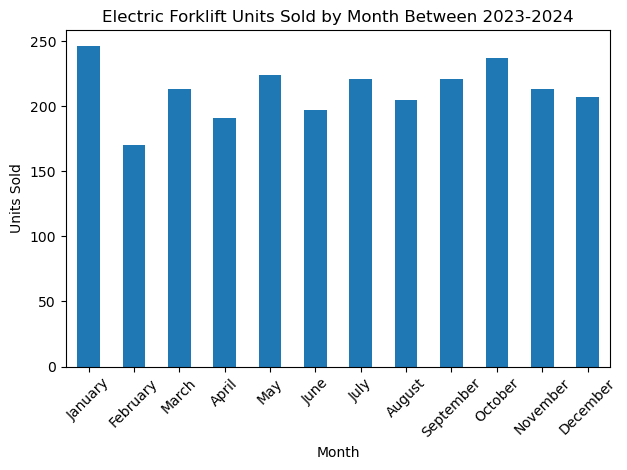

In [89]:
forklift_monthly_sales.plot(kind='bar')
plt.title("Electric Forklift Units Sold by Month Between 2023-2024")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()